In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\admin1\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r"C:\Coding\ML\data\iris.data", header = None,
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'])
data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


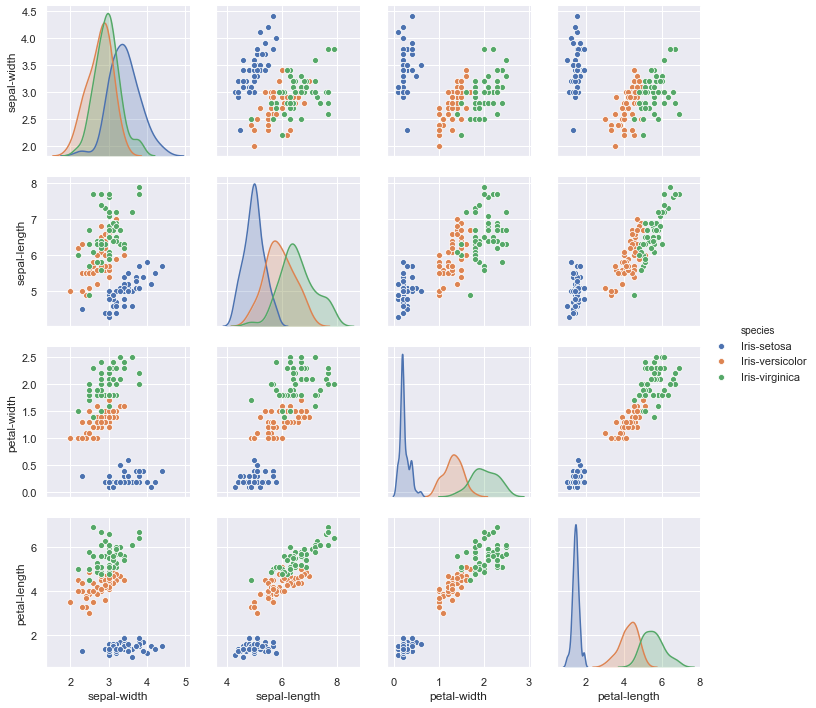

In [3]:
sns.pairplot(data, vars=['sepal-width', 'sepal-length', 'petal-width', 'petal-length'], hue = 'species')

In [4]:
data['species'].replace({'Iris-setosa':0,
'Iris-versicolor':1,
'Iris-virginica':2},
inplace = True)

Text(0, 0.5, 'petal-length')

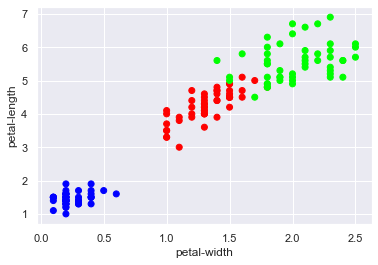

In [8]:
plt.scatter(data['petal-width'], data['petal-length'], c=data['species'], cmap='brg')
plt.xlabel('petal-width')
plt.ylabel('petal-length')

Text(0, 0.5, 'sepal_width')

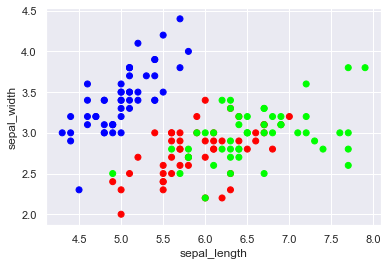

In [9]:
plt.scatter(data['sepal-length'], data['sepal-width'], c=data['species'], cmap='brg')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [10]:
X = data.iloc[:, :2]
y = data['species']
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, y)
classifier.score(X, y)

0.8333333333333334

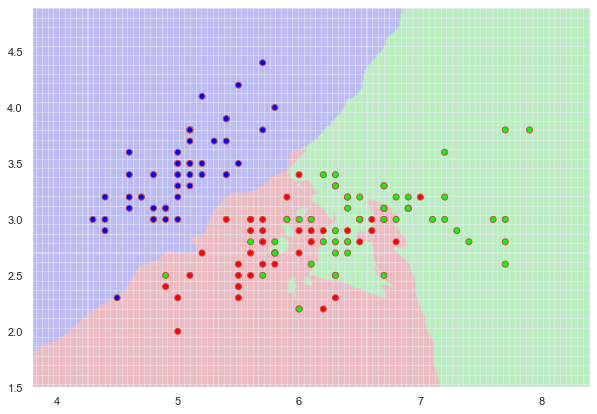

In [11]:
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap='brg', alpha=0.05)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='brg', edgecolors='r')

In [12]:
X = data.iloc[:, -3:-1]
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, y)
classifier.score(X, y)

0.96

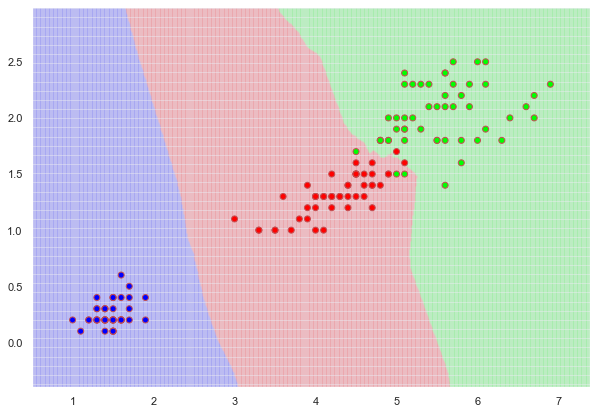

In [13]:
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap='brg', alpha=0.05)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='brg', edgecolors='r')

In [14]:
X = data.drop('species', axis = 1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train_shape (120,)
y_test shape (30,)


In [15]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9666666666666667

In [16]:
iris_1 = [5.2, 3.6, 1.6, 0.1]
iris_2 = [5.3, 3.75, 1.4, 0.3]
iris_3 = [6.4, 3.0, 4.6, 1.1]
iris_4 = [6.0, 2.9, 4.5, 1.3]
iris_5 = [7.1, 3.3, 6.1, 1.5]
iris_6 = [5.3, 3.5, 1.6, 0.3]
iris_7 = [15.1, 9.7, 8.9, 9.3]
iris_8 = [0.7, 0.3, 0.5, 0.7]

irises = [iris_1, iris_2, iris_3, iris_4, iris_5, iris_6, iris_7, iris_8]

classifier.predict(irises)

array([0, 0, 1, 1, 2, 0, 2, 0], dtype=int64)

In [17]:
classification = classifier.predict(irises)

for iris, species in zip(irises, classification):
  if species == 0:
    print(f'Flower {iris} is Iris-setosa')
  elif species == 1:
    print(f'Flower {iris} is Iris-versicolor')
  else:
    print(f'Flower {iris} is Iris-virginica')
                

Flower [5.2, 3.6, 1.6, 0.1] is Iris-setosa
Flower [5.3, 3.75, 1.4, 0.3] is Iris-setosa
Flower [6.4, 3.0, 4.6, 1.1] is Iris-versicolor
Flower [6.0, 2.9, 4.5, 1.3] is Iris-versicolor
Flower [7.1, 3.3, 6.1, 1.5] is Iris-virginica
Flower [5.3, 3.5, 1.6, 0.3] is Iris-setosa
Flower [15.1, 9.7, 8.9, 9.3] is Iris-virginica
Flower [0.7, 0.3, 0.5, 0.7] is Iris-setosa


In [18]:
iris_7 = [15.1, 9.7, 8.9, 9.3]
iris_8 = [0.7, 0.3, 0.5, 0.7]

Text(0, 0.5, 'petal-length')

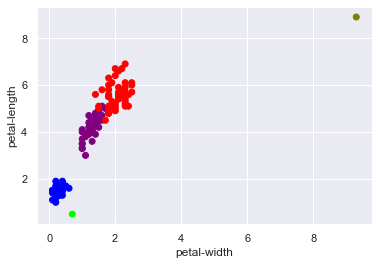

In [19]:
data.loc[150] = [15.1, 9.7, 8.9, 9.3, 3]
data.loc[151] = [0.7, 0.3, 0.5, 0.7, 4]

plt.scatter(data['petal-width'], data['petal-length'], c=data['species'], cmap='brg')
plt.xlabel('petal-width')
plt.ylabel('petal-length')

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {'n_neighbors':range(1,51)}

In [24]:
grid_search = GridSearchCV(KNeighborsClassifier(), parameters)
grid_search.fit(X, y)

C:\Users\admin1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\admin1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 51)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
grid_search.best_params_

{'n_neighbors': 5}